<a href="https://colab.research.google.com/github/Karuni001/Cognify_ML/blob/main/task3_Cusine_Classification_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load and clean the dataset
df = pd.read_csv("restaurant_data.csv")

df = df[['City', 'Average Cost for two', 'Price range', 'Has Online delivery',
         'Has Table booking', 'Country Code', 'Cuisines']]
print("Columns in dataset:", df.columns.tolist())
print("Initial rows:\n", df.head())

df.dropna(inplace=True)

Columns in dataset: ['City', 'Average Cost for two', 'Price range', 'Has Online delivery', 'Has Table booking', 'Country Code', 'Cuisines']
Initial rows:
                City  Average Cost for two  Price range Has Online delivery  \
0       Makati City                  1100            3                  No   
1       Makati City                  1200            3                  No   
2  Mandaluyong City                  4000            4                  No   
3  Mandaluyong City                  1500            4                  No   
4  Mandaluyong City                  1500            4                  No   

  Has Table booking  Country Code                          Cuisines  
0               Yes           162        French, Japanese, Desserts  
1               Yes           162                          Japanese  
2               Yes           162  Seafood, Asian, Filipino, Indian  
3                No           162                   Japanese, Sushi  
4               Yes       

In [5]:
df['Average Cost for two'] = df['Average Cost for two'].astype(str).str.replace(',', '')
df['Average Cost for two'] = pd.to_numeric(df['Average Cost for two'], errors='coerce')
df.dropna(inplace=True)

In [6]:
df['Has Online delivery'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})
df['Has Table booking'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})

In [7]:
# Encode categorical columns
le = LabelEncoder()
df['City'] = le.fit_transform(df['City'].astype(str))
df['Cuisines'] = df['Cuisines'].str.split(',').str[0].str.strip().str.lower()
df['Cuisines'] = le.fit_transform(df['Cuisines'])

In [8]:
X = df.drop('Cuisines', axis=1)
y = df['Cuisines']

In [9]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
# Predicting and evaluating
y_pred = clf.predict(X_test)

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         0
           2       0.24      0.16      0.19        55
           3       0.00      0.00      0.00         1
           6       0.14      0.06      0.08        17
           7       0.00      0.00      0.00         1
          11       0.17      0.11      0.13       109
          12       0.00      0.00      0.00         6
          13       0.50      0.20      0.29         5
          14       0.00      0.00      0.00         4
          15       0.00      0.00      0.00        13
          16       0.00      0.00      0.00         0
          17       0.00      0.00      0.00        22
          18       0.00      0.00      0.00         4
          19       0.00      0.00      0.00         3
          20       0.00      0.00      0.00         4
          21       0.05      0.03      0.04        31
   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

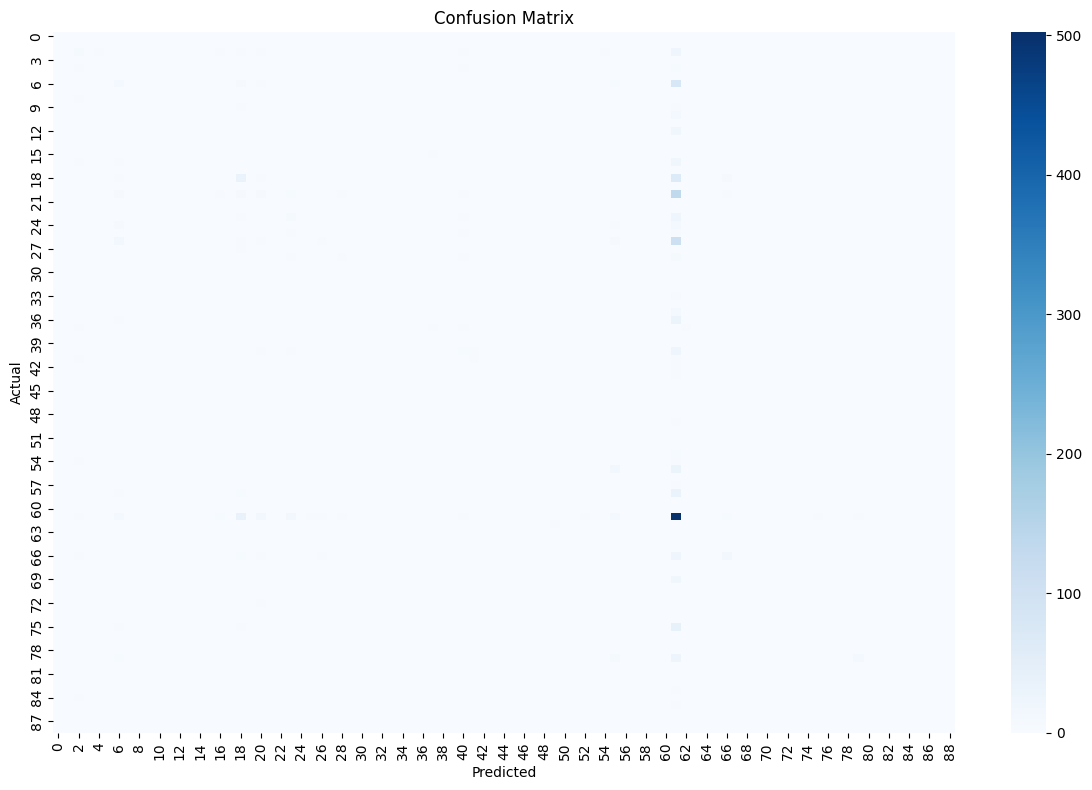

In [11]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=False, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()